In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:

json_size = 200000
for _json in pd.read_json('yelp_academic_dataset_review.json', chunksize=json_size, lines=True):
    reviews = _json
    break

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
business_id    200000 non-null object
cool           200000 non-null int64
date           200000 non-null datetime64[ns]
funny          200000 non-null int64
review_id      200000 non-null object
stars          200000 non-null int64
text           200000 non-null object
useful         200000 non-null int64
user_id        200000 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 13.7+ MB


# Quantidade de caracteres usados em relacao com a quantidade de estrelas dadas ao restaurante

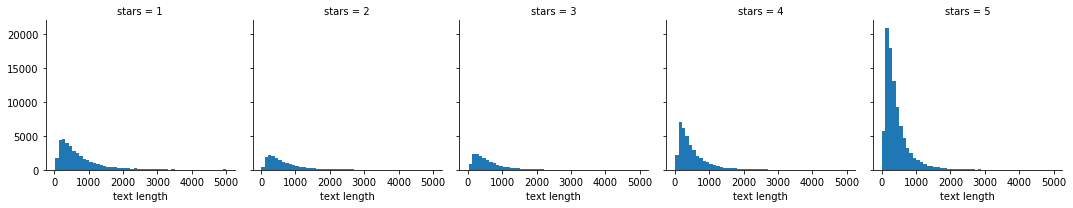

In [4]:
reviews['text length'] = reviews['text'].apply(len)
g = sns.FacetGrid(data=reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [5]:
reviews.describe()

,cool,funny,stars,useful,text length
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.267015,0.274035,3.659280,1.063090,552.600645
std,0.894015,1.310244,1.552399,2.746718,539.999264
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,219.000000
50%,0.000000,0.000000,4.000000,0.000000,384.000000
75%,0.000000,0.000000,5.000000,1.000000,686.000000
max,90.000000,328.000000,5.000000,536.000000,5000.000000


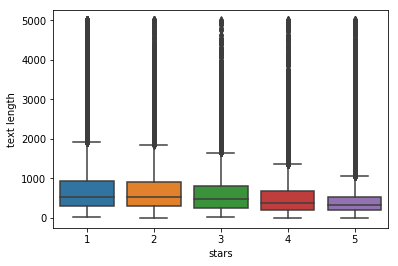

In [6]:
sns.boxplot(x='stars', y='text length', data=reviews)

In [7]:
stars = reviews.groupby('stars').mean()
stars.corr()

,cool,funny,useful,text length
cool,1.000000,-0.873424,-0.728264,-0.953010
funny,-0.873424,1.000000,0.957619,0.899288
useful,-0.728264,0.957619,1.000000,0.738389
text length,-0.953010,0.899288,0.738389,1.000000


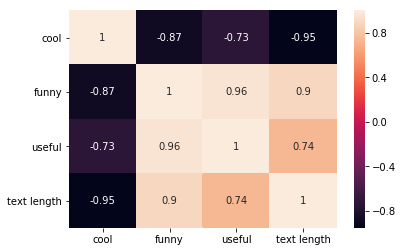

In [8]:
sns.heatmap(data=stars.corr(), annot=True)

In [9]:
reviews.shape

(200000, 10)

In [10]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,156
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,901
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,165


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,156
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,901
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,165


In [28]:
reviws_class = reviews[(reviews['stars'] == 1) | (reviews['stars'] == 5)]
reviws_class.shape

(128634, 10)

In [25]:
X = reviws_class['text']
yy = reviws_class['stars']

In [27]:
X[1]

'I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You have to try their cheese enchiladas too the sauce is different And amazing!!!'

In [36]:
import string
import nltk
from nltk.corpus import stopwords
# nltk.download() - Use  to download stopwords
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [37]:
print(text_process(X[1]))

['love', 'place', 'fiance', 'go', 'atleast', 'week', 'portions', 'huge', 'Food', 'amazing', 'love', 'carne', 'asada', 'great', 'lunch', 'specials', 'Leticia', 'super', 'nice', 'cares', 'think', 'restaurant', 'try', 'cheese', 'enchiladas', 'sauce', 'different', 'amazing']


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [40]:
len(bow_transformer.vocabulary_)

160020

In [43]:
review_2 = X[1]

In [46]:
bow_2 = bow_transformer.transform([review_2])


In [48]:
print(bow_2)

  (0, 26200)	1
  (0, 37309)	1
  (0, 68586)	2
  (0, 70510)	1
  (0, 70888)	1
  (0, 78475)	1
  (0, 78551)	1
  (0, 79908)	1
  (0, 88216)	1
  (0, 92276)	1
  (0, 95787)	1
  (0, 100445)	1
  (0, 101317)	1
  (0, 105774)	1
  (0, 113496)	2
  (0, 113752)	1
  (0, 119807)	1
  (0, 127145)	1
  (0, 128358)	1
  (0, 134296)	1
  (0, 137150)	1
  (0, 143003)	1
  (0, 145828)	1
  (0, 148806)	1
  (0, 151485)	1
  (0, 156577)	1


In [51]:
print(bow_transformer.get_feature_names()[26200])
print(bow_transformer.get_feature_names()[113496])


Food
love


In [ ]:
X = bow_transformer.transform(X)